In [1]:
# Source https://www.kaggle.com/bbusath5/sf-bike-share-exploration-with-sql

Today I will be performing an exploratory analysis on the SF Bay Area Bike Share database using SQLite supplemented by the pandas library.  The goal of this project is to demonstrate proficiency in extracting data from database files using SQL and the ability to analyze these values in context. This database contains four data tables: station, status, trip, and weather.

Here are some questions I will try to answer over the course of this exploration:
* What was the trip with the longest duration?
* Do unregistered users take longer or shorter trips?
*  Which stations are the most popular?
* Which routes are the most popular?




**Importing Packages**

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

First, the data must be imported into python. I will set up a function that takes an sql query as a parameter and returns a dataframe visualization of that query. This will save coding time in the long run.

In [3]:
%load_ext sql

### Defining Color Palette 

In [4]:
colors = ["#FF9AA2", "#FFB7B2","#FFDAC1",'#E2F0CB','#B5EAD7','#C7CEEA']

keys = ["red", "salmon","tan",'light_green','aqua_green','purple']
values = ["#FF9AA2", "#FFB7B2","#FFDAC1",'#E2F0CB','#B5EAD7','#C7CEEA']
color_dct = dict(zip(keys, values))

### Columns in tables

In [5]:
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
%sql SELECT * FROM trip LIMIT 1;

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
4069,174,8/29/2013 9:08,2nd at South Park,64,8/29/2013 9:11,2nd at South Park,64,288,Subscriber,94114


In [7]:
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
%sql SELECT * FROM yr_2019 LIMIT 1;

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


dummy,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,counter,year,age
1,320.0,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160,Central Park West & W 76 St,40.77896784,-73.97374737,3283,W 89 St & Columbus Ave,40.7882213,-73.97041561,15839,Subscriber,1971,1,1,2019,48


### Number of Rides By Subscription Type

In [8]:
%%time
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
result_SF = %sql SELECT subscription_type, count(*) AS count FROM trip GROUP BY subscription_type;
df_user_type_SF = result_SF.DataFrame()

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.
CPU times: user 282 ms, sys: 477 ms, total: 759 ms
Wall time: 1.66 s


In [10]:
%%time
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
result_NYC = %sql SELECT usertype, count(*) AS count FROM cb GROUP BY usertype;
df_user_type_NYC = result_NYC.DataFrame()

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.
CPU times: user 45.8 s, sys: 17.4 s, total: 1min 3s
Wall time: 1min 45s


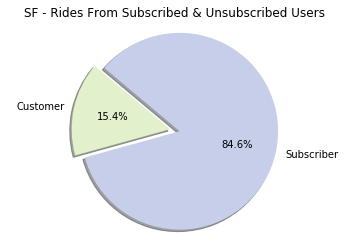

In [11]:
# SF
labels = ['Customer', 'Subscriber']
sizes = df_user_type_SF['count']
colors = [color_dct['light_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('SF - Rides From Subscribed & Unsubscribed Users')
plt.axis('equal')
plt.show()

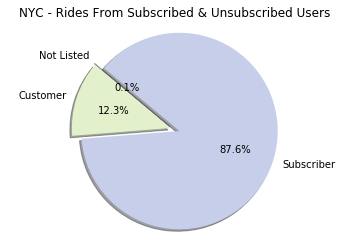

In [12]:
# NYC
labels = ['Not Listed', 'Customer', 'Subscriber']
sizes = df_user_type_NYC['count']
colors = ['lightyellow', color_dct['light_green'], color_dct['purple']]
explode = (0.1, 0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('NYC - Rides From Subscribed & Unsubscribed Users')
plt.axis('equal')
plt.show()

### Rides From Particular Stations

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


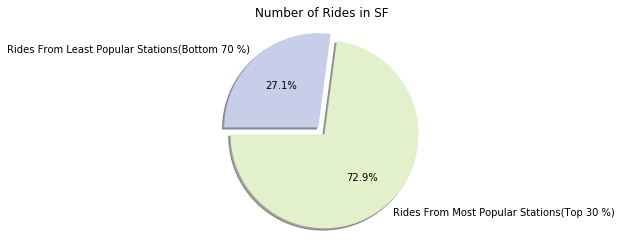

In [13]:
# SF
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
result_SF = %sql SELECT start_station_name AS Station, count(*) AS Count FROM trip GROUP BY start_station_name;
df_station_rides_SF = result_SF.DataFrame()

num_observations = df_station_rides_SF['Count'].sum()
df_station_rides_SF['Percent of Total Rides'] = round(100 * (df_station_rides_SF['Count'] / num_observations), 2)
df_station_rides_SF.rename(columns={'Count':'Number of Rides'}, inplace=True)
df_station_rides_SF.sort_values(by=['Number of Rides'], ascending=False, inplace=True)

percent=30
n_obs_top_percent = round(df_station_rides_SF.shape[0] * (percent/100))
rides_from_top_percent = df_station_rides_SF[0:n_obs_top_percent+1]['Number of Rides'].sum()
rides_from_bottom_percent = df_station_rides_SF[n_obs_top_percent+1:]['Number of Rides'].sum()
df_station_rides_SF

d = {'Percent of Stations': [str(percent), str(100-percent)], 'Number of Rides': [rides_from_top_percent, rides_from_bottom_percent]}
df = pd.DataFrame(data=d)

labels = [f'Rides From Most Popular Stations (Top {percent} %)', f'Rides From Least Popular Stations (Bottom {100-percent} %)']
sizes = df['Number of Rides']
colors = [color_dct['light_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180, )
plt.title('Number of Rides in SF')
plt.axis('equal')
plt.show()

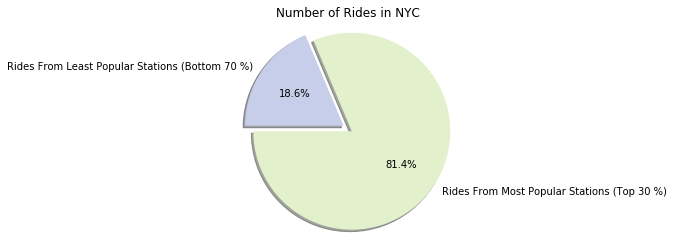

In [15]:
# NYC
df_station_rides = pd.read_csv('Number_of_Rides_Starting_From_Each_Station.csv')
df_station_rides.sort_values(by=['Number of Rides'], ascending=False, inplace=True)

percent=30
n_obs_top_percent = round(df_station_rides.shape[0] * (percent/100))
rides_from_top_percent = df_station_rides[0:n_obs_top_percent+1]['Number of Rides'].sum()
rides_from_bottom_percent = df_station_rides[n_obs_top_percent+1:]['Number of Rides'].sum()
rides_from_bottom_percent

d = {'Percent of Stations': [str(percent), str(100-percent)], 'Number of Rides': [rides_from_top_percent, rides_from_bottom_percent]}
df = pd.DataFrame(data=d)

labels = [f'Rides From Most Popular Stations (Top {percent} %)', f'Rides From Least Popular Stations (Bottom {100-percent} %)']
sizes = df['Number of Rides']
colors = [color_dct['light_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180, )
plt.title('Number of Rides in NYC')
plt.axis('equal')
plt.show()

### Trip Duration

In [53]:
%%time
result_SF = %sql SELECT duration FROM trip ORDER BY duration DESC;

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.
CPU times: user 660 ms, sys: 198 ms, total: 858 ms
Wall time: 884 ms


In [54]:
df_duration_SF = result_SF.DataFrame()
df_duration_SF['tripduration_hrs'] = df_duration_SF['duration'] / (60*60)
df_duration_SF['tripduration_days'] = df_duration_SF['duration'] / (60*60*24)
# df_duration_NYC[['tripduration', 'tripduration_hrs', 'tripduration_days']].head()
result_index = df_duration_SF['tripduration_hrs'].sub(1).abs().idxmin()
# df_duration_NYC.iloc[[result_index]][['tripduration', 'tripduration_hrs', 'tripduration_days']]
num_observations = df_duration_SF.shape[0]
print(f'The total number of rows in the 2019 table is {num_observations}.\nWhile the total number of tripdurations above 60 minutes is {result_index}.')
print(f'\nThe trips above 1 hour represent {round(100*(result_index/num_observations),2)} percent of the total dataset.')

The total number of rows in the 2019 table is 669959.
While the total number of tripdurations above 60 minutes is 21242.

The trips above 1 hour represent 3.17 percent of the total dataset.


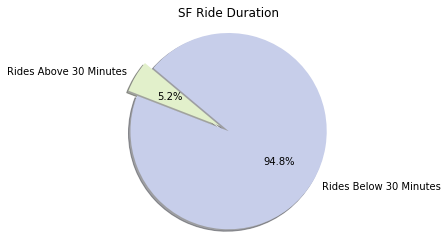

In [60]:
minutes = 30
num_observations = df_duration_SF.shape[0]
num_above_minute = df_duration_SF[df_duration_SF['duration']>=60*minutes].shape[0]
num_below_minute = num_observations - num_above_minute

d = {f'Category': [f'Rides Above {minutes} Minutes', f'Rides Below {minutes} Minutes'], 'Number of Rides': [ num_above_minute, num_below_minute]}
df = pd.DataFrame(data=d)

labels = [f'Rides Above {minutes} Minutes', f'Rides Below {minutes} Minutes']
sizes = df['Number of Rides']
colors = [color_dct['light_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('SF Ride Duration')
plt.axis('equal')
plt.show()

In [16]:
%%time
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
result_NYC = %sql SELECT tripduration FROM yr_2019 ORDER BY tripduration DESC;

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.
CPU times: user 28.6 s, sys: 10.9 s, total: 39.5 s
Wall time: 55.7 s


In [58]:
df_duration_NYC = result_NYC.DataFrame()
df_duration_NYC['tripduration_hrs'] = df_duration_NYC['tripduration'] / (60*60)
df_duration_NYC['tripduration_days'] = df_duration_NYC['tripduration'] / (60*60*24)
# df_duration_NYC[['tripduration', 'tripduration_hrs', 'tripduration_days']].head()
result_index = df_duration_NYC['tripduration_hrs'].sub(1).abs().idxmin()
# df_duration_NYC.iloc[[result_index]][['tripduration', 'tripduration_hrs', 'tripduration_days']]
num_observations = df_duration_NYC.shape[0]
print(f'The total number of rows in the 2019 table is {num_observations}.\nWhile the total number of tripdurations above 60 minutes is {result_index}.')
print(f'\nThe trips above 1 hour represent {round(100*(result_index/num_observations),2)} percent of the total dataset.')

The total number of rows in the 2019 table is 20956644.
While the total number of tripdurations above 60 minutes is 197937.

The trips above 1 hour represent 0.94 percent of the total dataset.


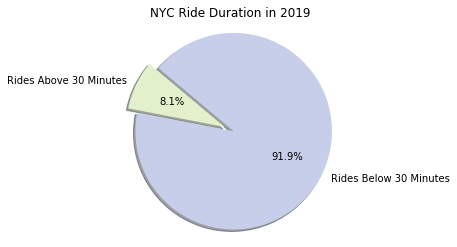

In [61]:
minutes = 30
num_observations = df_duration_NYC.shape[0]
num_above_minute = df_duration_NYC[df_duration_NYC['tripduration']>=60*minutes].shape[0]
num_below_minute = num_observations - num_above_minute

d = {f'Category': [f'Rides Above {minutes} Minutes', f'Rides Below {minutes} Minutes'], 'Number of Rides': [ num_above_minute, num_below_minute]}
df = pd.DataFrame(data=d)

labels = [f'Rides Above {minutes} Minutes', f'Rides Below {minutes} Minutes']
sizes = df['Number of Rides']
colors = [color_dct['light_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('NYC Ride Duration in 2019')
plt.axis('equal')
plt.show()

### Leaving vs. Arriving Ratio for Each Station

In [147]:
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
# %sql SELECT * FROM trip LIMIT 2;
result_start_station_SF = %sql SELECT start_station_name AS Start_Station, count(*) AS Count FROM trip GROUP BY start_station_name;
result_end_station_SF = %sql SELECT end_station_name AS End_Station, count(*) AS Count FROM trip GROUP BY end_station_name;

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


In [148]:
df_start_station_rides_SF = result_start_station_SF.DataFrame().sort_values(by=['Count'], ascending=False)
df_end_station_rides_SF = result_end_station_SF.DataFrame().sort_values(by=['Count'], ascending=False)

In [149]:
num_observations = df_start_station_rides_SF['Count'].sum()
df_end_station_rides_SF['Percent of Total Rides'] = round(100 * (df_end_station_rides_SF['Count'] / num_observations), 2)
df_end_station_rides_SF.rename(columns={'Count':'Number of Rides'}, inplace=True)
# df_end_station_rides_SF.head(2)
# df_end_station_rides_SF.to_csv('Number_of_Rides_Ending_From_Each_Station.csv', index=False)

In [150]:
num_observations = df_start_station_rides_SF['Count'].sum()
df_start_station_rides_SF['Percent of Total Rides'] = round(100 * (df_start_station_rides_SF['Count'] / num_observations), 2)
df_start_station_rides_SF.rename(columns={'Count':'Number of Rides'}, inplace=True)
# df_start_station_rides_SF.head(2)

In [151]:
left = df_start_station_rides_SF.copy()
left.set_index('Start_Station', inplace=True)
left.rename(columns = {'Number of Rides':'Number of Start Rides'}, inplace=True)
left.drop(['Percent of Total Rides'], axis=1, inplace=True)

right = df_end_station_rides_SF.copy()
right.set_index('End_Station', inplace=True)
right.rename(columns = {'Number of Rides':'Number of End Rides'}, inplace=True)
right.drop(['Percent of Total Rides'], axis=1, inplace=True)
right_mod = right.groupby('End_Station').agg({'Number of End Rides': 'sum'})
right_mod.head(2)

df_concat = pd.concat([left, right_mod], axis=1, sort=False)
# df_concat.sample(10)

df_concat['Start_Ratio'] = df_concat['Number of Start Rides'] / df_concat['Number of End Rides']
df_concat.dropna(inplace=True) 
df_concat.sort_values(by=['Start_Ratio'], inplace=True)

In [153]:
df_concat.describe()

,Number of Start Rides,Number of End Rides,Start_Ratio
count,74.00000,74.000000,74.000000
mean,9053.50000,9053.500000,1.025842
std,10045.49677,11068.350963,0.189569
min,23.00000,23.000000,0.688053
25%,1522.50000,1449.000000,0.902596
50%,4076.50000,3552.500000,1.000000
75%,13922.00000,12278.000000,1.116342
max,49092.00000,63179.000000,1.770851


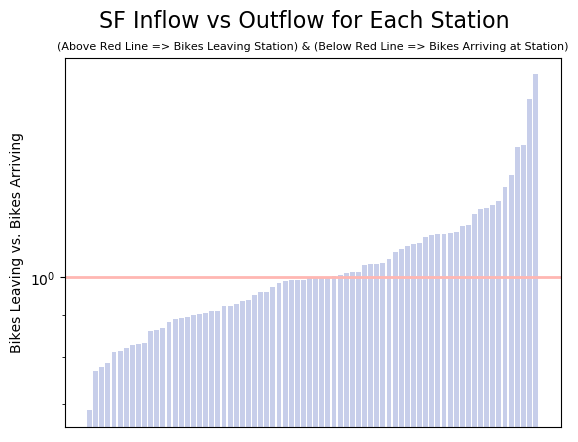

In [152]:
plt.style.use('default')
plt.bar(df_concat.index.to_list(), df_concat['Start_Ratio'], color=color_dct['purple'])
plt.xlabel("")
plt.ylabel("Bikes Leaving vs. Bikes Arriving")
plt.suptitle('SF Inflow vs Outflow for Each Station', fontsize=16)
plt.title("(Above Red Line => Bikes Leaving Station) & (Below Red Line => Bikes Arriving at Station)", fontsize=8)
plt.yscale('log')
plt.xticks([])
plt.axhline(y=1, linewidth=2, color=color_dct['salmon'])
plt.show()

In [63]:
%%time
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
result = %sql SELECT end_station_name AS End_Station, count(*) AS Count FROM cb GROUP BY start_station_name;

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.
CPU times: user 1min 20s, sys: 37.8 s, total: 1min 58s
Wall time: 3min 42s


In [64]:
df_end_station_rides = result.DataFrame()
num_observations = df_end_station_rides['Count'].sum()
df_end_station_rides['Percent of Total Rides'] = round(100 * (df_end_station_rides['Count'] / num_observations), 2)
df_end_station_rides.rename(columns={'Count':'Number of Rides'}, inplace=True)
df_end_station_rides.head(5)
df_end_station_rides.to_csv('Number_of_Rides_Ending_From_Each_Station.csv', index=False)

In [75]:
df_start_station_rides_NYC = pd.read_csv('Number_of_Rides_Starting_From_Each_Station.csv')
left = df_start_station_rides_NYC.copy()
left.set_index('Station', inplace=True)
left.rename(columns = {'Number of Rides':'Number of Start Rides'}, inplace=True)
left.drop(['Percent of Total Rides'], axis=1, inplace=True)

df_end_station_rides_NYC = pd.read_csv('Number_of_Rides_Ending_From_Each_Station.csv')
right = df_end_station_rides_NYC.copy()
right.set_index('End_Station', inplace=True)
right.rename(columns = {'Number of Rides':'Number of End Rides'}, inplace=True)
right.drop(['Percent of Total Rides'], axis=1, inplace=True)
right_mod = right.groupby('End_Station').agg({'Number of End Rides': 'sum'})
right_mod.head(2)

df_concat = pd.concat([left, right_mod], axis=1, sort=False)
# df_concat.sample(10)

df_concat['Start_Ratio'] = df_concat['Number of Start Rides'] / df_concat['Number of End Rides']
df_concat.dropna(inplace=True) # 600 STATIONS WERE NA. I.e. THEY HAVE NEVER BEEN USED AS END STATIONS
df_concat.sort_values(by=['Start_Ratio'], inplace=True)

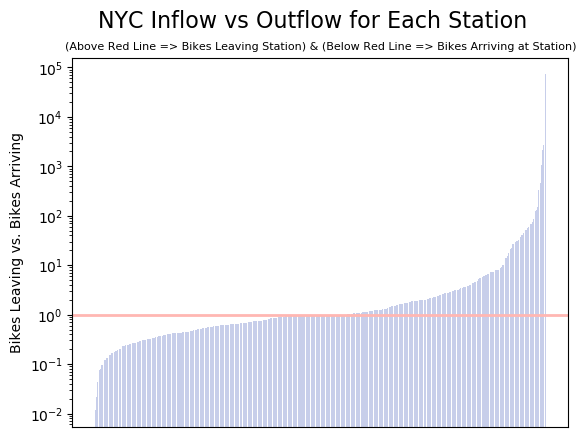

In [103]:
plt.style.use('default')
plt.bar(df_concat.index.to_list(), df_concat['Start_Ratio'], color=color_dct['purple'])
plt.xlabel("")
plt.ylabel("Bikes Leaving vs. Bikes Arriving")
plt.suptitle('NYC Inflow vs Outflow for Each Station', fontsize=16)
plt.title("(Above Red Line => Bikes Leaving Station) & (Below Red Line => Bikes Arriving at Station)", fontsize=8)
plt.yscale('log')
plt.xticks([])
plt.axhline(y=1, linewidth=2, color=color_dct['salmon'])
plt.show()

**Q1: What was the trip with the longest duration? **

In [ ]:
query = '''
SELECT *
FROM trip
ORDER BY duration DESC
LIMIT 1
'''

run_query(query)

So it appears that the longest ride recorded is over six months long! It is very likely that this could have been a glitch. Pulling up the top 10 longest rides will hopefully provide some context as to whether this datapoint is a fluke.

In [ ]:
query = '''
SELECT *
FROM trip
ORDER BY duration DESC
LIMIT 10
'''

run_query(query)

Lets see if how common it is for a ride to go over 24 hours

In [ ]:
query = '''
SELECT count(*)
AS \'Long Trips\'
FROM trip 
WHERE 
duration >= 60*60*24;
'''
#60 seconds in a minute, 60 minutes in an hour, 24 hours in a day

run_query(query)

It appears that all but two of the 10 longest trips were made by unsubscribed customers. Let's see if unregistered customers are the main culprits.



**Q2: Do unregistered users take longer or shorter trips?**

First let's plot a pie chart to determine the proportion of unregistered users.

In [ ]:
query = '''
SELECT subscription_type, count(*) AS count
FROM trip
GROUP BY subscription_type
'''

df = pd.read_sql_query(query, db)

labels = ['Casual', 'Subscriber']
sizes = df['count']
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('Subscribed vs Unsubscribed Riders')
plt.axis('equal')
plt.show()


In [ ]:
query = '''
SELECT subscription_type, AVG(duration)/60 AS 'Average Duration'
FROM trip
GROUP BY subscription_type
''' 
#since duration is in seconds, we will convert to minutes
run_query(query)

So unsubscribed customers take much longer rides on average. This would make sense as unsubscribed customers are more unaware of the charges that are incurred if you go over your 30 minute time limit. Other potential influential factors include the fact that unsubscribed customers come from certain demographics, such as tourists who would be doing more sight-seeing.



**Q3: Which stations are the most popular?**

In order to extract the data needed, the "trip" and "station" tables will need to be inner-joined:



In [ ]:
query = '''
SELECT station.name AS Station, count(*) AS Count
FROM station
INNER JOIN trip
ON station.id = trip.start_station_id
GROUP BY station.name
ORDER BY count DESC
LIMIT 5
''' 

run_query(query)

For anyone who is familiar with San Fransisco, it would make sense why these are the most popular stations. Townsend at 4th is blocks away from AT&T park, the financial district, and is the location of both a Caltrain and BART station. Both the Caltrain and BART serve hundreds of thousands of commuters every day. The Ferry Building is also one of the iconic landmarks of San Fransisco and is right along the Embarcadero, a very popular area among tourists.


Lets take this a step further. We can utilize the "status" table in the database and determine which stations are empty the most. It appears that the status table consists of status updates pulled from each station every two minutes. Each station contains 1,047,142 unique status readings.

In [ ]:

#there are 1047142 total status readings for each station

query = '''
SELECT station.name AS Station, count(*) AS 'Total Empty Readings'
FROM station

INNER JOIN status
ON status.station_id=station.id
WHERE status.bikes_available=0
GROUP BY station.name

ORDER BY count(*) DESC
LIMIT 10

''' 

run_query(query)

It turns out only two out of 5 of our most popular stations are in the top 10 most empty stations. The other three must be very popular drop-off stations as well, which allows the kiosks to maintain a steady number of bikes.

Lets create a quick plot to show the distribution of available bike readings for all stations.

In [ ]:
query = '''
SELECT bikes_available AS 'Bikes Available'
FROM status

''' 

df = pd.read_sql_query(query, db)
df['Bikes Available'].plot.hist(bins=27, title='Bikes Available (All Stations)', 
                                ec='black', alpha=0.5)

**Q4: Which routes are the most popular?**


This can be done using a simple "group by" statement.

In [ ]:
query='''
SELECT start_station_name, end_station_name, COUNT(*) AS Count
FROM trip
GROUP BY start_station_name, end_station_name
ORDER BY Count DESC
LIMIT 10;
  '''
run_query(query)